In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [4]:
def Function(X, n0, n1, T, R):
    return n0*(np.sqrt(((X-T[0])**2)+T[1]**2))+n1*(np.sqrt(((X-R[0])**2)+R[1]**2))

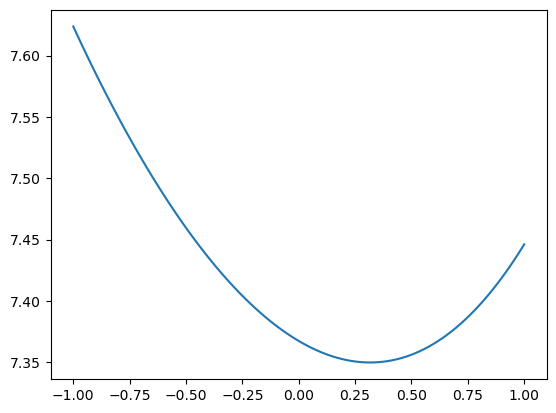

In [6]:
#Punto b
n0 = 1
n1 = 1.33
T = np.array([-3,2])
R = np.array([2,-2])
X = np.linspace(-1,1,100)
y = Function(X, n0, n1, T, R)
plt.plot(X,y)

El minimo de la funcion es  0.3169057571717496


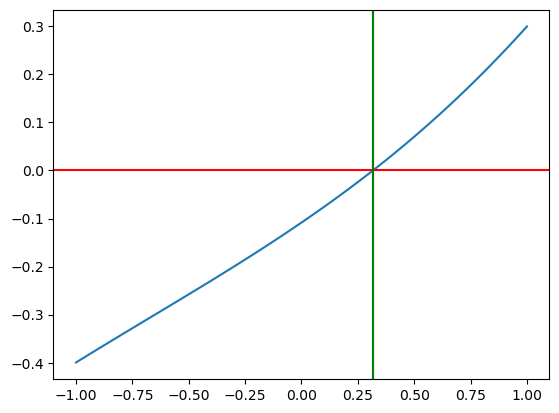

In [8]:
#Punto C
def Function(_x):
    n0 = 1
    n1 = 1.33
    T0 = -3
    T1 = 2
    R0 = 2
    R1 = -2
    x = sym.Symbol('x',real=True)
    a = n0*((((x-T0)**2)+T1**2))**(0.5) + n1*((((x-R0)**2)+R1**2)**(0.5))
    a = sym.diff(a,x, 1)
    
    f = sym.lambdify([x],a,'numpy')


    return f(_x)
 
_x = np.linspace(-1,1,100)


plt.plot(_x,Function(_x))
plt.axhline(y=0, color='r')
plt.axvline(x=0.31690575717257435, color='green')


def Derivative(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)
def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-6):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
            #print(error)
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn
    
   # print('Raiz: ',xn,it)
    
   # return xn
x = GetNewtonRaphson(Function,Derivative,1)

plt.axvline(x=x, color='green')

print("El minimo de la funcion es ", x)

In [12]:
#Punto D y E
n0 = 1
n1 = 1.33
T = np.array([-3,2])
R = np.array([2,-2])

a0 = -1*np.arctan(T[1]/T[0])
a0

a1 = -1*np.arctan(R[1]/R[0])
a1

#Ley de Snell

t = n0/n1 == np.sin(a1)/np.sin(a0)

print("El ángulo α0 es igual a= ", a0, "El ángulo α1 es igual a= ", a1,", ambos en radianes, y, cumple la ley de snell?", t)

El ángulo α0 es igual a=  0.5880026035475675 El ángulo α1 es igual a=  0.7853981633974483 , ambos en radianes, y, cumple la ley de snell? False
